In [28]:
import cv2 
import mediapipe as mp 
import numpy as np 
from matplotlib import pyplot as plt 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [43]:
cap = cv2.VideoCapture(1)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.15, min_tracking_confidence=0.15) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
            #@ MediaPipe’s detection models require the input image to be non-writable for optimal performance.
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            #print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
            #@ results.pose_landmarks: are all the landmarks the model predicts 
            #@ mp_pose.POSE_CONNECTIONS: we will see which landmarks are connecte with which landmarks 
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

len(landmarks)

for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility

landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


x: 0.8775169253349304
y: 1.6561981439590454
z: -0.6865262389183044
visibility: 0.021879583597183228

In [25]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
                                     color=RED_CO

In [23]:
print(pose.process(frame).pose_landmarks)

landmark {
  x: 0.41797104477882385
  y: 0.3784392178058624
  z: -1.0909640789031982
  visibility: 0.9999611377716064
}
landmark {
  x: 0.4375942647457123
  y: 0.2910867929458618
  z: -1.025381326675415
  visibility: 0.9999076128005981
}
landmark {
  x: 0.45142704248428345
  y: 0.2901432514190674
  z: -1.025973916053772
  visibility: 0.9998805522918701
}
landmark {
  x: 0.4661152958869934
  y: 0.2916072607040405
  z: -1.0258198976516724
  visibility: 0.9999065399169922
}
landmark {
  x: 0.38762709498405457
  y: 0.2997622489929199
  z: -1.0299261808395386
  visibility: 0.999945878982544
}
landmark {
  x: 0.373473584651947
  y: 0.3046785593032837
  z: -1.0308786630630493
  visibility: 0.999947190284729
}
landmark {
  x: 0.35758307576179504
  y: 0.30914974212646484
  z: -1.0313365459442139
  visibility: 0.9999538660049438
}
landmark {
  x: 0.4855807423591614
  y: 0.3171933889389038
  z: -0.6118184924125671
  visibility: 0.9999101161956787
}
landmark {
  x: 0.3421339988708496
  y: 0.340479

(720, 1280, 3)


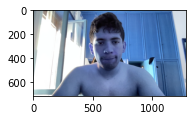

In [3]:
plt.subplot(1,2,1)
plt.imshow(frame)

print(frame.shape )
# (480, 640, 3)


In [7]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Open the video capture
cap = cv2.VideoCapture('Images/CorrectDeadlift_45f.mp4')

# Create a Pose object
pose = mp_pose.Pose()

while cap.isOpened():
    # Capture a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with the Pose object
    results = pose.process(frame)

    # Convert the frame back to BGR
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Draw the pose landmarks on the frame
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Check if the user pressed the 'q' key
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the video capture and destroy all windows
cap.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


1   HIToolbox                           0x00007ff821a4a52b _ZN15MenuBarInstance21IsAutoShowHideAllowedEv + 259
2   HIToolbox                           0x00007ff82194333e _ZN15MenuBarInstance24UpdateAutoShowVisibilityE5Pointh + 34
3   HIToolbox                           0x00007ff8218b281f _ZN15MenuBarInstance16ForEachMenuBarDoEU13block_pointerFvPS_E + 169
4   HIToolbox                           0x00007ff82194393d _ZN15MenuBarInstance20AutoShowHideObserverEjP14OpaqueEventRefPv + 165
5   HIToolbox                           0x00007ff8218a9bd2 _NotifyEventLoopObservers + 153
6   HIToolbox                           0x00007ff8218dbfb8 PostEventToQueueInternal + 700
7   HIToolbox                           0x00007ff8218dd871 _ZL29CreateAndPostEventWithCGEventP9__CGEventjhP17__CFMachPortBoost + 404
8   HIToolbox                           0x00007ff8218dd225 _ZL38PullEventsFromWindowServerOnConnectionjhP17__CFMachPortBoost + 252
9   HIToolbox                           0x00007ff8218dd0fb _ZL14Messa

-1

: 

#### Try 3D

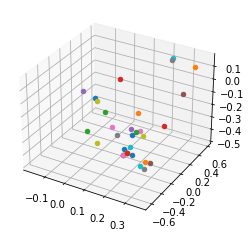

In [12]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

# Read an image
image = cv2.imread('Images/squat.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Holistic
with mp_holistic.Holistic(static_image_mode=True) as holistic:
    # Perform pose estimation
    results = holistic.process(image)

    # Extract 3D pose landmarks
    pose_landmarks = results.pose_world_landmarks.landmark

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the pose landmarks
    for landmark in pose_landmarks:
        ax.scatter(landmark.x, landmark.y, landmark.z)

# Show the plot
plt.show()


In [14]:
connections = [
    (mp_pose.PoseLandmark.NOSE, mp_pose.PoseLandmark.LEFT_EYE_INNER),
    (mp_pose.PoseLandmark.LEFT_EYE_INNER, mp_pose.PoseLandmark.LEFT_EYE),
    (mp_pose.PoseLandmark.LEFT_EYE, mp_pose.PoseLandmark.LEFT_EYE_OUTER),
    (mp_pose.PoseLandmark.LEFT_EYE_OUTER, mp_pose.PoseLandmark.LEFT_EAR),
    (mp_pose.PoseLandmark.NOSE, mp_pose.PoseLandmark.RIGHT_EYE_INNER),
    (mp_pose.PoseLandmark.RIGHT_EYE_INNER, mp_pose.PoseLandmark.RIGHT_EYE),
    (mp_pose.PoseLandmark.RIGHT_EYE, mp_pose.PoseLandmark.RIGHT_EYE_OUTER),
    (mp_pose.PoseLandmark.RIGHT_EYE_OUTER, mp_pose.PoseLandmark.RIGHT_EAR),
    (mp_pose.PoseLandmark.MOUTH_LEFT, mp_pose.PoseLandmark.MOUTH_RIGHT),
    (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_ELBOW),
    (mp_pose.PoseLandmark.RIGHT_ELBOW, mp_pose.PoseLandmark.RIGHT_WRIST),
    (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_ELBOW),
    (mp_pose.PoseLandmark.LEFT_ELBOW, mp_pose.PoseLandmark.LEFT_WRIST),
    (mp_pose.PoseLandmark.RIGHT_HIP, mp_pose.PoseLandmark.RIGHT_KNEE),
    (mp_pose.PoseLandmark.RIGHT_KNEE, mp_pose.PoseLandmark.RIGHT_ANKLE),
    (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.LEFT_KNEE),
    (mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.LEFT_ANKLE)
]


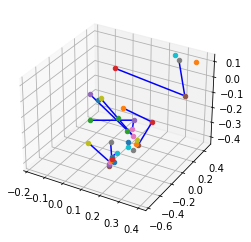

In [15]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# For static images:
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5)

image = cv2.imread('Images/squat.png')
image_height, image_width, _ = image.shape
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Draw the pose annotation on the image.
# annotated_image = image.copy()
# mp_drawing.draw_landmarks(
#     annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
# cv2.imwrite('annotated_image.png', annotated_image)

# Plot pose world landmarks.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for landmark in mp_pose.PoseLandmark:
    ax.scatter(
        results.pose_world_landmarks.landmark[landmark].x,
        results.pose_world_landmarks.landmark[landmark].y,
        results.pose_world_landmarks.landmark[landmark].z)

# Draw edges between keypoints using the connections variable
for connection in connections:
    start_idx, end_idx = connection
    ax.plot(
        [results.pose_world_landmarks.landmark[start_idx].x, results.pose_world_landmarks.landmark[end_idx].x],
        [results.pose_world_landmarks.landmark[start_idx].y, results.pose_world_landmarks.landmark[end_idx].y],
        [results.pose_world_landmarks.landmark[start_idx].z, results.pose_world_landmarks.landmark[end_idx].z],
        color='blue')
plt.show()


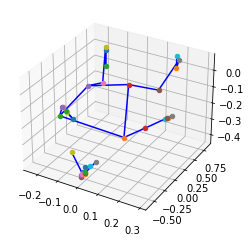

In [17]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# For static images:
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5)

image = cv2.imread('Images/stand.png')
image_height, image_width, _ = image.shape
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Draw the pose annotation on the image.
annotated_image = image.copy()
mp_drawing.draw_landmarks(
    annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
cv2.imwrite('annotated_image.png', annotated_image)

# Plot pose world landmarks.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for landmark in mp_pose.PoseLandmark:
    ax.scatter(
        results.pose_world_landmarks.landmark[landmark].x,
        results.pose_world_landmarks.landmark[landmark].y,
        results.pose_world_landmarks.landmark[landmark].z)

# Draw edges between keypoints using the POSE_CONNECTIONS variable
for connection in mp_pose.POSE_CONNECTIONS:
    start_idx, end_idx = connection
    ax.plot(
        [results.pose_world_landmarks.landmark[start_idx].x, results.pose_world_landmarks.landmark[end_idx].x],
        [results.pose_world_landmarks.landmark[start_idx].y, results.pose_world_landmarks.landmark[end_idx].y],
        [results.pose_world_landmarks.landmark[start_idx].z, results.pose_world_landmarks.landmark[end_idx].z],
        color='blue')
plt.show()


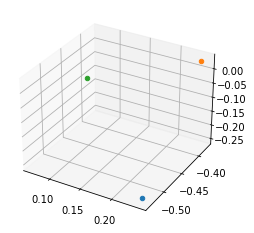

In [13]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# For static images:
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5)

image = cv2.imread('Images/squat.png')
image_height, image_width, _ = image.shape
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Draw the pose annotation on the image.
annotated_image = image.copy()
mp_drawing.draw_landmarks(
    annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
cv2.imwrite('annotated_image.png', annotated_image)

# Plot pose world landmarks.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x,
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y,
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE].z)
ax.scatter(
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x,
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y,
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].z)
ax.scatter(
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x,
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y,
    results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].z)
plt.show()

# Draw edges between keypoints using the connections variable
connections = [
  (mp_pose.PoseLandmark.NOSE, mp_pose.PoseLandmark.LEFT_SHOULDER),
  (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER),
]

for connection in connections:
  start_idx, end_idx = connection
  ax.plot(
      [results.pose_world_landmarks.landmark[start_idx].x, results.pose_world_landmarks.landmark[end_idx].x],
      [results.pose_world_landmarks.landmark[start_idx].y, results.pose_world_landmarks.landmark[end_idx].y],
      [results.pose_world_landmarks.landmark[start_idx].z, results.pose_world_landmarks.landmark[end_idx].z],
      color='blue')
plt.show()
